# Spotify Song Recommendation System

Intent: Make an application that will take in a song as an input and output similar recommendations

Keywords: Machine Learning, Data Science, Recommendation Systems 

## Setup
Setting up all dependencies

### Import Modules

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use("ggplot")

### Helper Functions

In [83]:
# helpers for this 
from IPython.display import HTML, display

def qq(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:bold; color:{"white"}; background-color:{"black"}; padding:0px;">Q: {text}</div>'))

def objective(text):
    display(HTML(f'<h3><div style=";">{text}</h3>'))


def nts(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:bold; color:{"white"}; background-color:{"green"}; padding:10px;">Prompt : {text}</div>'))

def observation(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:bold; color:{"white"}; background-color:{"green"}; padding:10px;">Observation: {text}</div>'))    

def finding(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:normal; color:{"blue"}; background-color:{"white"};">Findings: {text}</div>'))    

def conclusion(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:bold; color:{"white"}; background-color:{"green"}; padding:10px;">Result: {text}</div>'))    
    
def aha(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:bold; color:{"blue"}; background-color:{"yellow"}; padding:10px;">{text}</div>'))

### About the Dataset

The data is uploaded to kaggle by Gautham Vijayaraj.

https://www.kaggle.com/datasets/gauthamvijayaraj/spotify-tracks-dataset-updated-every-week/data

It covers metadata of over 60,000 Spotify tracks ranging over 6 different language - English, Hindi, Tamil, Telugu, Malayalam and Korean.

### Loading the .csv

#### Import .csv

In [84]:
path_to_dataset=r"E:\Datasets\SpotifyTracks\spotify_tracks.csv"

df=pd.read_csv(path_to_dataset)
display(df.head(5))

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil


#### Check number of rows and colums

In [85]:
n_rows,n_cols=df.shape
df.info()

finding(f"There are {n_rows} datapoints. {n_cols} raw features")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

#### Delete duplicate rows

In [86]:
#### Data cleaning- Taking the risk to modify data
#objective("Check for duplicate rows")

duplicates= df[df.duplicated()] 

display(duplicates)

finding(f"Found {duplicates.shape[0]} duplicate rows.")

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
2495,50RcuWjfUcoJfWMNegXF0b,"Ee Raathale (From ""Radhe Shyam"")","Yuvan Shankar Raja, Harini Ivaturi, Justin Pra...",2021,57,https://i.scdn.co/image/ab67616d0000b273c01ce9...,"Ee Raathale (From ""Radhe Shyam"")",0.0284,0.630,232763.0,...,9.0,0.1070,-8.574,0.0,0.0311,124.000,4.0,0.551,https://open.spotify.com/track/50RcuWjfUcoJfWM...,Tamil
2496,5zDRx2IlpoiNHBpmG4btVN,"Per Vachaalum Vaikkaama (From ""Dikkiloona"")","Yuvan Shankar Raja, Ilaiyaraaja, Malaysia Vasu...",2021,51,https://i.scdn.co/image/ab67616d0000b27377e32a...,"Per Vachaalum Vaikkaama (From ""Dikkiloona"")",0.3050,0.761,268400.0,...,9.0,0.0603,-4.049,1.0,0.1150,74.995,4.0,0.926,https://open.spotify.com/track/5zDRx2IlpoiNHBp...,English
2497,3huCRjAX12zNPxtX9JqX2X,"Naanga Vera Maari (From ""Valimai"")","Yuvan Shankar Raja, Anurag Kulkarni",2021,52,https://i.scdn.co/image/ab67616d0000b273fba530...,"Naanga Vera Maari (From ""Valimai"")",0.1020,0.649,254345.0,...,1.0,0.3230,-5.442,1.0,0.1990,149.949,4.0,0.601,https://open.spotify.com/track/3huCRjAX12zNPxt...,Tamil
2498,21r0QnhYxsxYUsoov5o0IF,Per Vachaalum Vaikkaama,"Yuvan Shankar Raja, Ilaiyaraaja, Malaysia Vasu...",2021,47,https://i.scdn.co/image/ab67616d0000b2736dd803...,Dikkiloona (Original Motion Picture Soundtrack),0.3020,0.754,268400.0,...,9.0,0.0582,-4.049,1.0,0.1180,75.009,4.0,0.929,https://open.spotify.com/track/21r0QnhYxsxYUso...,English
2499,42LMjL86cep0L8QA1q0doE,Voice Of Unity,"Yuvan Shankar Raja, Silambarasan TR, Arivu",2021,43,https://i.scdn.co/image/ab67616d0000b273fe1d00...,Maanaadu (Original Motion Picture Soundtrack),0.0594,0.632,238400.0,...,6.0,0.1740,-6.415,1.0,0.1300,149.951,4.0,0.336,https://open.spotify.com/track/42LMjL86cep0L8Q...,Tamil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,2sYIrPDAeu3i9vlVrofwvh,"Harla Farla (From ""Chakra (Telugu)"")","Yuvan Shankar Raja, Ranjith Govind, Sanjana Ka...",2020,1,https://i.scdn.co/image/ab67616d0000b273e32f5f...,"Harla Farla (From ""Chakra (Telugu)"")",0.2590,0.758,206796.0,...,0.0,0.0728,-5.569,1.0,0.0628,97.997,4.0,0.319,https://open.spotify.com/track/2sYIrPDAeu3i9vl...,Telugu
2569,0DqKN7Wg0lsQaf6MuaREpX,Munnala Ninna Pothum,"Yuvan Shankar Raja, Saindhavi, Sunandan",2020,4,https://i.scdn.co/image/ab67616d0000b2734ae5bd...,Dabangg 3,0.2700,0.496,246625.0,...,9.0,0.1390,-3.419,1.0,0.1120,128.921,4.0,0.848,https://open.spotify.com/track/0DqKN7Wg0lsQaf6...,Tamil
2570,7jSXMBdFfshfffYQmWWbHz,"Maari Gethu (From ""Maari 2"")","Yuvan Shankar Raja, Dhanush, V.M. Mahalingam, ...",2020,0,https://i.scdn.co/image/ab67616d0000b27320428b...,U1 For Life,0.1440,0.721,226297.0,...,0.0,0.5280,-8.840,1.0,0.0578,92.468,4.0,0.694,https://open.spotify.com/track/7jSXMBdFfshfffY...,Tamil
2571,6DVTHHdDFEnL9UcDaLSCvg,Suttute Suttute,Yuvan Shankar Raja,2020,0,https://i.scdn.co/image/ab67616d0000b2732ace61...,Preethiya Payana (Original Motion Picture Soun...,0.4370,0.846,280676.0,...,1.0,0.1640,-11.122,1.0,0.0717,125.014,4.0,0.635,https://open.spotify.com/track/6DVTHHdDFEnL9Uc...,Tamil


In [87]:
#objective("Delete duplicate rows and recalculate rows and columns")
df.drop_duplicates(inplace=True)

df.info()

finding(f"new shape is {df.shape}")

<class 'pandas.core.frame.DataFrame'>
Index: 62239 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62239 non-null  object 
 1   track_name        62239 non-null  object 
 2   artist_name       62239 non-null  object 
 3   year              62239 non-null  int64  
 4   popularity        62239 non-null  int64  
 5   artwork_url       62239 non-null  object 
 6   album_name        62239 non-null  object 
 7   acousticness      62239 non-null  float64
 8   danceability      62239 non-null  float64
 9   duration_ms       62239 non-null  float64
 10  energy            62239 non-null  float64
 11  instrumentalness  62239 non-null  float64
 12  key               62239 non-null  float64
 13  liveness          62239 non-null  float64
 14  loudness          62239 non-null  float64
 15  mode              62239 non-null  float64
 16  speechiness       62239 non-null  float64
 17

#### Set Index 

In [88]:
#objective("Fix the primary key for indexing. Im leaving index= row number default as it is for now.")

#### Find missing values

In [89]:
df_new=df.replace(-1, np.nan)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62239 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62239 non-null  object 
 1   track_name        62239 non-null  object 
 2   artist_name       62239 non-null  object 
 3   year              62239 non-null  int64  
 4   popularity        62239 non-null  int64  
 5   artwork_url       62239 non-null  object 
 6   album_name        62239 non-null  object 
 7   acousticness      62204 non-null  float64
 8   danceability      62204 non-null  float64
 9   duration_ms       62239 non-null  float64
 10  energy            62204 non-null  float64
 11  instrumentalness  62204 non-null  float64
 12  key               62204 non-null  float64
 13  liveness          62204 non-null  float64
 14  loudness          62239 non-null  float64
 15  mode              62204 non-null  float64
 16  speechiness       62204 non-null  float64
 17

In [90]:
# only 35 missing values in 62000, so delete
df=df.replace(-1,np.nan).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62204 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62204 non-null  object 
 1   track_name        62204 non-null  object 
 2   artist_name       62204 non-null  object 
 3   year              62204 non-null  int64  
 4   popularity        62204 non-null  int64  
 5   artwork_url       62204 non-null  object 
 6   album_name        62204 non-null  object 
 7   acousticness      62204 non-null  float64
 8   danceability      62204 non-null  float64
 9   duration_ms       62204 non-null  float64
 10  energy            62204 non-null  float64
 11  instrumentalness  62204 non-null  float64
 12  key               62204 non-null  float64
 13  liveness          62204 non-null  float64
 14  loudness          62204 non-null  float64
 15  mode              62204 non-null  float64
 16  speechiness       62204 non-null  float64
 17

#### Rename columns to meaningful names

In [91]:
objective("Rename the columns of 'df' to meaningful names now. Include measurement units if relevant eg: 'height_cm' not 'height'")

finding("All columns are labelled")

## Data Exploration
Get an intuitive understanding on what kind of data we have, the size of data, types of data, brainstorming and developing insights.

### What features are available?

In [92]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 62204 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62204 non-null  object 
 1   track_name        62204 non-null  object 
 2   artist_name       62204 non-null  object 
 3   year              62204 non-null  int64  
 4   popularity        62204 non-null  int64  
 5   artwork_url       62204 non-null  object 
 6   album_name        62204 non-null  object 
 7   acousticness      62204 non-null  float64
 8   danceability      62204 non-null  float64
 9   duration_ms       62204 non-null  float64
 10  energy            62204 non-null  float64
 11  instrumentalness  62204 non-null  float64
 12  key               62204 non-null  float64
 13  liveness          62204 non-null  float64
 14  loudness          62204 non-null  float64
 15  mode              62204 non-null  float64
 16  speechiness       62204 non-null  float64
 17

None

### Interpreting the datatypes of available features

Any feature typically boils down closely to one of the following buckets- categorical, ordinal, binary, numeric continuous, numeric discrete, and remaining are typically useless for model training (eg: index related columns like track_id,cust_id)

In [93]:
'''
# Programmatic Guessing
df_categorical_cols=df.select_dtypes(include=["string","object"]).columns.tolist()
df_binary_cols=[col for col in df.columns if df[col].nunique() == 2]
df_ordinal_cols=[col for col in df.columns if df[col].nunique() < 10]
df_numeric_cols=df.select_dtypes(include=["number"]).columns.tolist()

aha("Programmatic Guess")

print(f"categorical_features={df_categorical_cols}")
print(f"ordinal_features={df_ordinal_cols}")
print(f"binary_features={df_binary_cols}")
print(f"numeric_features={df_numeric_cols}")
print(f"numericdiscrete_features=[]")
print(f"useless_features=[]")
'''


'\n# Programmatic Guessing\ndf_categorical_cols=df.select_dtypes(include=["string","object"]).columns.tolist()\ndf_binary_cols=[col for col in df.columns if df[col].nunique() == 2]\ndf_ordinal_cols=[col for col in df.columns if df[col].nunique() < 10]\ndf_numeric_cols=df.select_dtypes(include=["number"]).columns.tolist()\n\naha("Programmatic Guess")\n\nprint(f"categorical_features={df_categorical_cols}")\nprint(f"ordinal_features={df_ordinal_cols}")\nprint(f"binary_features={df_binary_cols}")\nprint(f"numeric_features={df_numeric_cols}")\nprint(f"numericdiscrete_features=[]")\nprint(f"useless_features=[]")\n'

In [94]:
#objective("understand the datatypes of features")
df.columns

Index(['track_id', 'track_name', 'artist_name', 'year', 'popularity',
       'artwork_url', 'album_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'track_url', 'language'],
      dtype='object')

In [95]:
categorical_features= ['artist_name','album_name','language'] # artist_name is composite...
ordinal_features= ['key', 'time_signature',"mode"]
binary_features= []
numeric_features= ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness', 'speechiness', 'tempo', 'valence']
numericdiscrete_features= ['year','popularity']
useless_features= ['track_id','track_name', 'artwork_url', 'track_url']
#datetime_features=[]

In [96]:
df[categorical_features]

,artist_name,album_name,language
0,Anirudh Ravichander,"Leo Das Entry (From ""Leo"")",Tamil
1,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",AAO KILLELLE,Tamil
2,"Anirudh Ravichander, Anivee, Alvin Bruno",Mayakiriye Sirikiriye (Orchestral EDM),Tamil
3,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",Scene Ah Scene Ah (Experimental EDM Mix),Tamil
4,"Anirudh Ravichander, Benny Dayal, Leon James, ...",Gundellonaa X I Am a Disco Dancer (Mashup),Tamil
...,...,...,...
62312,"Arvind Raj, Sheezay, Music Kitchen, FSPROD Vin...",Sani (G.O.A.T Remix),Tamil
62313,"A H Kaashif, Navakkarai Naveen Prabanjam, Asal...",Bachelor (Original Motion Picture Soundtrack),Tamil
62314,"Rakesh Ambigapathy, Asal Kolaar, MC Vickey",Yo Baby,Tamil
62315,"Asal Kolaar, Priyadarshan Balasubramanian",Arjuna Phalguna,Tamil


In [97]:
df[ordinal_features]

,key,time_signature,mode
0,8.0,4.0,0.0
1,10.0,3.0,0.0
2,2.0,4.0,0.0
3,7.0,4.0,1.0
4,7.0,4.0,1.0
...,...,...,...
62312,7.0,4.0,1.0
62313,8.0,4.0,1.0
62314,7.0,4.0,1.0
62315,1.0,4.0,1.0


In [98]:
df[numeric_features]

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.02410,0.753,97297.0,0.970,0.055300,0.1000,-5.994,0.1030,110.997,0.459
1,0.08510,0.780,207369.0,0.793,0.000000,0.0951,-5.674,0.0952,164.995,0.821
2,0.03110,0.457,82551.0,0.491,0.000000,0.0831,-8.937,0.1530,169.996,0.598
3,0.22700,0.718,115831.0,0.630,0.000727,0.1240,-11.104,0.4450,169.996,0.362
4,0.01530,0.689,129621.0,0.748,0.000001,0.3450,-9.637,0.1580,128.961,0.593
...,...,...,...,...,...,...,...,...,...,...
62312,0.08490,0.877,359718.0,0.469,0.000000,0.1100,-11.458,0.3530,100.024,0.504
62313,0.07880,0.833,154364.0,0.689,0.000000,0.2670,-5.061,0.0813,110.041,0.524
62314,0.00918,0.842,234000.0,0.765,0.000000,0.0790,-5.855,0.1370,122.038,0.669
62315,0.10100,0.682,180807.0,0.861,0.000000,0.3200,-6.061,0.2850,74.993,0.439


In [99]:
df[numericdiscrete_features]

,year,popularity
0,2024,59
1,2024,47
2,2024,35
3,2024,24
4,2024,22
...,...,...
62312,2021,30
62313,2021,30
62314,2021,18
62315,2021,1


In [100]:
df[binary_features]

""
0
1
2
3
4
...
62312
62313
62314
62315


In [21]:
df[useless_features]

#note to future: track_name could be utilitzed if you split the names by space bar and store them as tags

,track_id,track_name,artwork_url,track_url
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",https://i.scdn.co/image/ab67616d0000b273ce9c65...,https://open.spotify.com/track/2r0ROhr7pRN4MXD...
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,https://i.scdn.co/image/ab67616d0000b273be1b03...,https://open.spotify.com/track/4I38e6Dg52a2o2a...
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,https://i.scdn.co/image/ab67616d0000b27334a1dd...,https://open.spotify.com/track/59NoiRhnom3lTeR...
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,https://i.scdn.co/image/ab67616d0000b27332e623...,https://open.spotify.com/track/5uUqRQd385pvLxC...
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,https://i.scdn.co/image/ab67616d0000b2735a59b6...,https://open.spotify.com/track/1KaBRg2xgNeCljm...
...,...,...,...,...
62312,3eHDwMQYPEziy2DWRBNoLv,Sani - G.O.A.T Remix,https://i.scdn.co/image/ab67616d0000b273819d23...,https://open.spotify.com/track/3eHDwMQYPEziy2D...
62313,5hHtCqkNv5eo99OrEFFcgS,Life of Bachelor,https://i.scdn.co/image/ab67616d0000b2736cd651...,https://open.spotify.com/track/5hHtCqkNv5eo99O...
62314,08foF9YHgKmIgOy3xMWRZy,Yo Baby,https://i.scdn.co/image/ab67616d0000b27300da25...,https://open.spotify.com/track/08foF9YHgKmIgOy...
62315,2wLFbVlQGKJSd9lwzwL47F,Fast Fast Vadiley,https://i.scdn.co/image/ab67616d0000b273e051e1...,https://open.spotify.com/track/2wLFbVlQGKJSd9l...


---

### Working with Numeric Features

In [22]:
df_numerical_data=df[numeric_features]
df_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62204 entries, 0 to 62316
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      62204 non-null  float64
 1   danceability      62204 non-null  float64
 2   duration_ms       62204 non-null  float64
 3   energy            62204 non-null  float64
 4   instrumentalness  62204 non-null  float64
 5   liveness          62204 non-null  float64
 6   loudness          62204 non-null  float64
 7   speechiness       62204 non-null  float64
 8   tempo             62204 non-null  float64
 9   valence           62204 non-null  float64
dtypes: float64(10)
memory usage: 5.2 MB


In [23]:
df_numerical_data

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.02410,0.753,97297.0,0.970,0.055300,0.1000,-5.994,0.1030,110.997,0.459
1,0.08510,0.780,207369.0,0.793,0.000000,0.0951,-5.674,0.0952,164.995,0.821
2,0.03110,0.457,82551.0,0.491,0.000000,0.0831,-8.937,0.1530,169.996,0.598
3,0.22700,0.718,115831.0,0.630,0.000727,0.1240,-11.104,0.4450,169.996,0.362
4,0.01530,0.689,129621.0,0.748,0.000001,0.3450,-9.637,0.1580,128.961,0.593
...,...,...,...,...,...,...,...,...,...,...
62312,0.08490,0.877,359718.0,0.469,0.000000,0.1100,-11.458,0.3530,100.024,0.504
62313,0.07880,0.833,154364.0,0.689,0.000000,0.2670,-5.061,0.0813,110.041,0.524
62314,0.00918,0.842,234000.0,0.765,0.000000,0.0790,-5.855,0.1370,122.038,0.669
62315,0.10100,0.682,180807.0,0.861,0.000000,0.3200,-6.061,0.2850,74.993,0.439


In [24]:
df_numerical_data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,62204.000000,62204.000000,6.220400e+04,62204.000000,62204.000000,62204.000000,62204.000000,62204.000000,62204.000000,62204.000000
mean,0.363108,0.597667,2.427052e+05,0.603318,0.146699,0.194844,-8.945049,0.088353,117.990627,0.496088
std,0.313098,0.182422,1.129582e+05,0.243324,0.306520,0.169775,5.332863,0.112313,28.373053,0.262472
min,0.000000,0.000000,1.002700e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,0.067300,0.498000,1.923600e+05,0.440000,0.000000,0.093200,-10.720000,0.036700,95.950000,0.293000
50%,0.286000,0.631000,2.363790e+05,0.639000,0.000025,0.125000,-7.505000,0.048900,117.994500,0.508000
75%,0.633000,0.730000,2.863502e+05,0.803000,0.015200,0.243000,-5.454000,0.089125,135.082000,0.710000
max,0.996000,0.986000,4.581483e+06,1.000000,0.999000,0.998000,1.233000,0.959000,239.970000,0.995000


#### Visualising Distributions: Violin+Box Plot   

Univariate analysis to understand the spread of datapoints

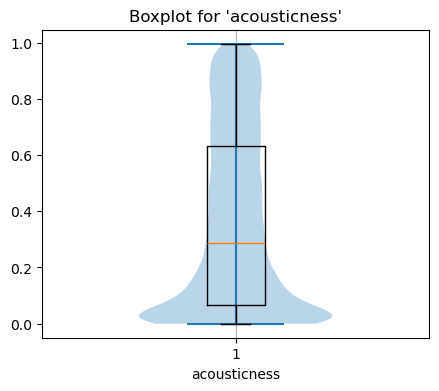

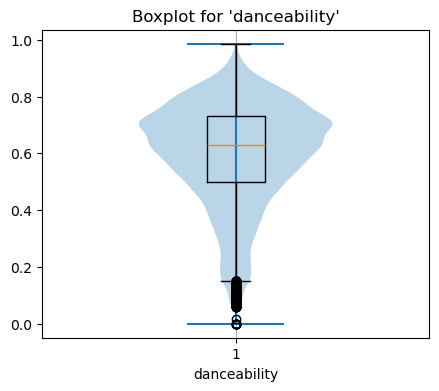

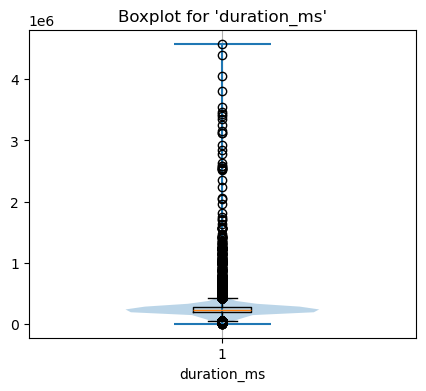

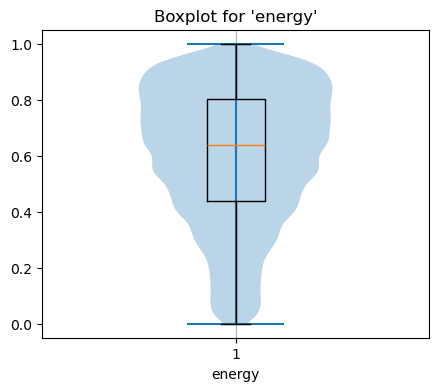

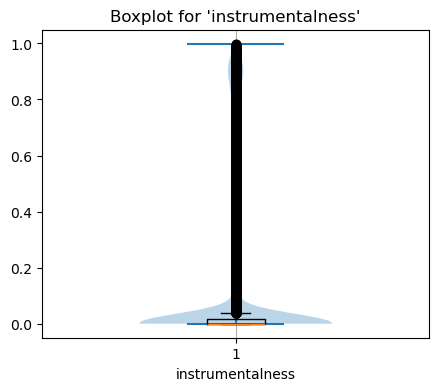

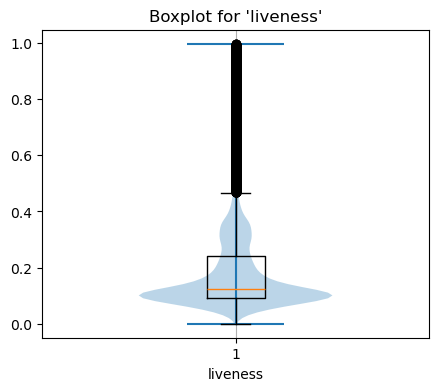

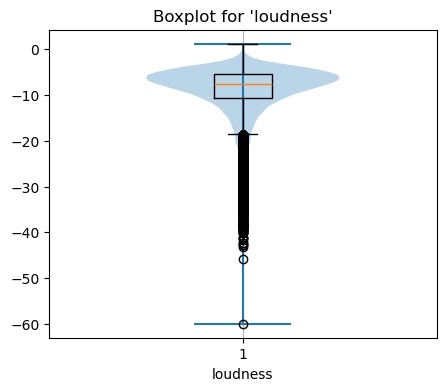

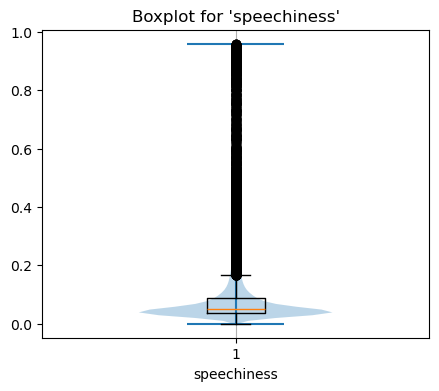

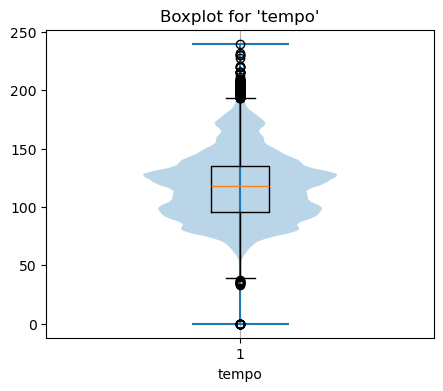

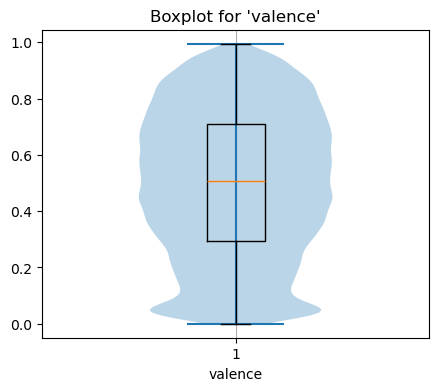

In [25]:
for col in df_numerical_data.columns:
    plt.figure(figsize=(5,4))
    plt.violinplot(df_numerical_data[col], vert=True)  # Horizontal boxplot
    plt.boxplot(df_numerical_data[col], vert=True)  # Horizontal boxplot
    plt.title(f"Boxplot for '{col}'")  # Title for the plot
    plt.xlabel(col)  # Label for the x-axis
    plt.grid(axis='x')  # Optional: Add gridlines for clarity
    plt.show()

In [26]:
#

#### Handling missing values for numerical features
There are no missing values in any features, as an extension to that, there are no missing values in numerical features.

In [102]:
'''df_numerical_data.isnull().sum()'''

'df_numerical_data.isnull().sum()'

In [101]:
'''
#visualise missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_numerical_data.isnull())
plt.title("Heatmap of missing values")
plt.show()
'''

'\n#visualise missing values\nplt.figure(figsize=(10,6))\nsns.heatmap(df_numerical_data.isnull())\nplt.title("Heatmap of missing values")\nplt.show()\n'

In [103]:
'''df_numerical_data.isna().sum()'''

'df_numerical_data.isna().sum()'

#### Outlier Detection for Numerical Categories
The site says the data was obtain by the spotify's own public web api, its reasonable to go forward with the notion the outliers are nature of data and not mistakes. 

In [29]:
# The site says the data was obtain by the spotify's own public web api, its reasonable to go forward with the notion the outliers are nature of data and not mistakes. 

### Working with Categorical Features
['artist_name', 'album_name', 'language']

In [104]:
# The list of categorical features
aha(categorical_features)

In [105]:
def analyse_categorical_feature(feature):
    aha(f"{feature}")
    print(f"There are {df[feature].nunique()} unique {feature}s labels")
    print(f"\n{df[feature].value_counts()}")

#### Handling'artist_name'
artist name is a composite label eg "Artist A, Artist B, Artist C"

In [107]:
#artist_name is a problem... its composite feature, eg"Artist 1,Artist 2", so it would be necessary to 
analyse_categorical_feature('artist_name')

There are 12511 unique artist_names labels

artist_name
Shankar Mahadevan                                                               1391
Alan Silvestri                                                                  1178
Daniel Pemberton                                                                1154
Ramin Djawadi                                                                   1152
Shreya Ghoshal                                                                  1041
                                                                                ... 
The Chainsmokers, Daya, Ephwurd                                                    1
The Chainsmokers, XYLØ, Vanic                                                      1
The Chainsmokers, Phoebe Ryan, Oliver Heldens                                      1
The Chainsmokers, XYLØ, Sigma                                                      1
Harshavardhan Rameshwar, G. V. Prakash, Dharmaseelan Udaiyappan, Asal Kolaar       1
Name: cou

But these are composite values, so we need to make a 1hot encoded sparse matrix

In [33]:
'''
artists=set()
for i in df["artist_name"]:
    temp=i.split(",")
    artists.update(temp)
    

pd.DataFrame(artists)
'''

'\nartists=set()\nfor i in df["artist_name"]:\n    temp=i.split(",")\n    artists.update(temp)\n    \n\npd.DataFrame(artists)\n'

In [47]:
artists_frequency={}
for i in df["artist_name"]:
    temp=i.split(",")
    for j in temp:
        if j in artists_frequency:
            artists_frequency[j]+=1
        else:
            artists_frequency[j]=1
    
artists_frequency_df=pd.DataFrame(list(artists_frequency.items()), columns=["Artist", "Frequency"])
artists_frequency_df.sort_values(by="Frequency", ascending=False, inplace=True)

artists_frequency_df

,Artist,Frequency
5231,Ilaiyaraaja,3782
2125,A.R. Rahman,2757
3115,Shankar Mahadevan,2214
3021,Shreya Ghoshal,1963
438,Yuvan Shankar Raja,1707
...,...,...
4318,Shaswati Fukan,1
4316,Nafees Alam,1
4315,Yogesh,1
4312,R3lic AT2,1


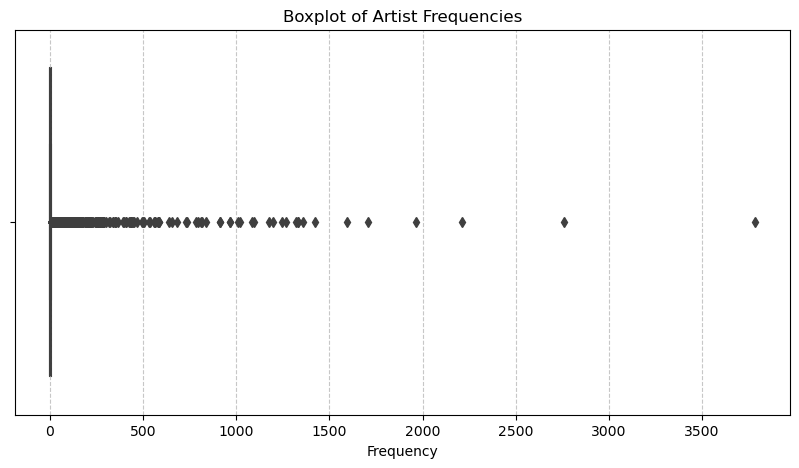

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=artists_frequency_df['Frequency'])

plt.title("Boxplot of Artist Frequencies")
plt.xlabel("Frequency")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [78]:
threshold=0.7
artists_frequency_df['Frequency'].quantile(threshold)  # 75th percentile
artists_frequency_df[artists_frequency_df['Frequency']>artists_frequency_df['Frequency'].quantile(threshold)]

,Artist,Frequency
5231,Ilaiyaraaja,3782
2125,A.R. Rahman,2757
3115,Shankar Mahadevan,2214
3021,Shreya Ghoshal,1963
438,Yuvan Shankar Raja,1707
...,...,...
2882,Farhan Akhtar,4
7833,Honor of Kings,4
949,Ko Sesha,4
272,Karthika Vaidyanathan,4


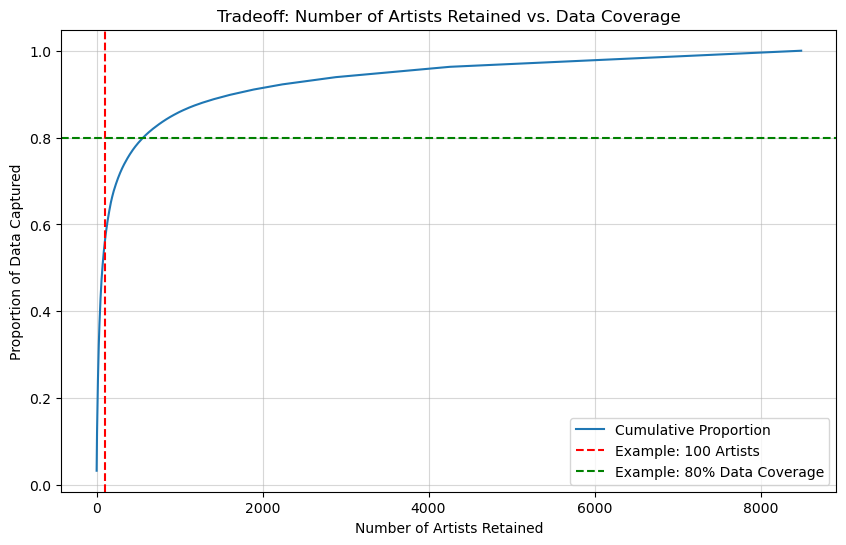

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Sort artists by frequency
sorted_frequencies = artists_frequency_df['Frequency'].sort_values(ascending=False).values

# Cumulative sum of frequencies
cumulative_frequencies = np.cumsum(sorted_frequencies)

# Proportion of total frequency captured
total_frequency = cumulative_frequencies[-1]
cumulative_proportion = cumulative_frequencies / total_frequency

# Number of artists
num_artists = np.arange(1, len(sorted_frequencies) + 1)

# Plot the tradeoff
plt.figure(figsize=(10, 6))
plt.plot(num_artists, cumulative_proportion, label="Cumulative Proportion")
plt.axvline(x=100, color='r', linestyle='--', label="Example: 100 Artists")
plt.axhline(y=0.8, color='g', linestyle='--', label="Example: 80% Data Coverage")

plt.title("Tradeoff: Number of Artists Retained vs. Data Coverage")
plt.xlabel("Number of Artists Retained")
plt.ylabel("Proportion of Data Captured")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

#matrix_artist_name = df['artist_name'].str.get_dummies(sep=',')

#### 'album_name'

In [273]:
analyse_categorical_feature("album_name")

There are 19892 unique album_names labels

album_name
Nowhere to Hide (Unabridged)                                                                                                                  186
Cottage by the Sea [A BRAND NEW pulse-pounding, gripping psychological thriller from TOP TEN BESTSELLER Keri Beevis for 2024 (Unabridged)]    144
The Summer House [The BRAND NEW addictive psychological thriller from the bestselling author of THE SLEEPOVER (Unabridged)]                   140
The Boat House [The BRAND NEW page-turning psychological thriller from TOP 10 BESTSELLER Keri Beevis for 2023 (Unabridged)]                   115
Dawn FM (Alternate World)                                                                                                                      83
                                                                                                                                             ... 
Perfect Symphony (Ed Sheeran & Andrea Bocelli)                        

#### 'language'

In [274]:
analyse_categorical_feature("language")

There are 7 unique languages labels

language
English      23366
Unknown      13005
Tamil        12604
Korean        6887
Hindi         5739
Telugu         321
Malayalam      282
Name: count, dtype: int64


There are 7 unique languages

## Data Preprocessing

In [83]:
df_numerical_cols_data

,year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2024,59,0.02410,0.753,97297.0,0.970,0.055300,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459
1,2024,47,0.08510,0.780,207369.0,0.793,0.000000,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821
2,2024,35,0.03110,0.457,82551.0,0.491,0.000000,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598
3,2024,24,0.22700,0.718,115831.0,0.630,0.000727,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362
4,2024,22,0.01530,0.689,129621.0,0.748,0.000001,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62312,2021,30,0.08490,0.877,359718.0,0.469,0.000000,7.0,0.1100,-11.458,1.0,0.3530,100.024,4.0,0.504
62313,2021,30,0.07880,0.833,154364.0,0.689,0.000000,8.0,0.2670,-5.061,1.0,0.0813,110.041,4.0,0.524
62314,2021,18,0.00918,0.842,234000.0,0.765,0.000000,7.0,0.0790,-5.855,1.0,0.1370,122.038,4.0,0.669
62315,2021,1,0.10100,0.682,180807.0,0.861,0.000000,1.0,0.3200,-6.061,1.0,0.2850,74.993,4.0,0.439


### Handling Missing Values
Dealing with empty or partially empty records 

In [79]:
missing_values=df.isnull().sum()
missing_values

track_id            0
track_name          0
artist_name         0
year                0
popularity          0
artwork_url         0
album_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
track_url           0
language            0
dtype: int64

### Handling Outliers 
Data exists but you suspect is wrong/ spammy

### Feature Engineering

- Which columns to pick and not pick?
- Any duplicate/ highly correlated columns?
- Any column with heavy missing values?
- Can I synthesize a new feature using existing columns that can serve more utility?
- If the values aren't spread out well in the boxplot but rather focused to 1 spot... then variance is ~0, maybe its a suboptimal feature

In [161]:
####

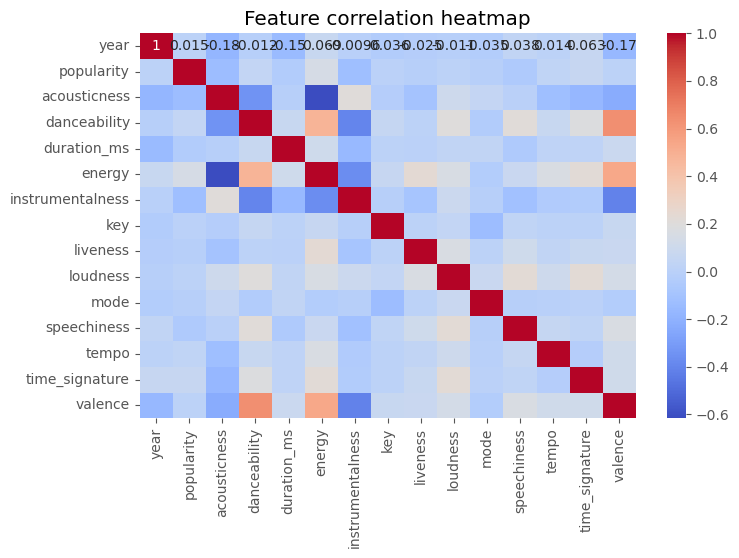

In [85]:
corr_matrix=df_numerical_cols_data.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Feature correlation heatmap")
plt.show()

# correlation is scale invariant, no need to normalise first

[]

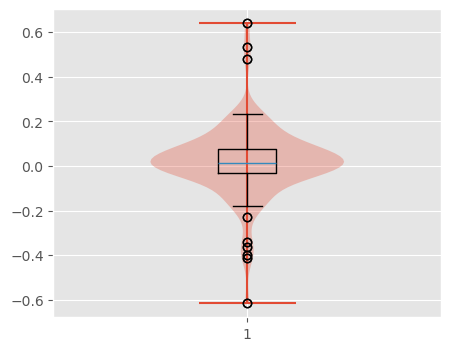

In [86]:
_corr_values=corr_matrix.values.flatten()
_corr_values=_corr_values[_corr_values != 1]

plt.figure(figsize=(5,4))
plt.violinplot(_corrm_values)
plt.boxplot(_corrm_values)
plt.plot()

In [111]:
'''
qq("Intent: Now, Im determining the appropriate threshold for cuttoff.")

lower_bound = np.quantile(_corr_values, 0.05)  # 5th percentile
upper_bound = np.quantile(_corr_values, 0.95)  # 95th percentile

finding(f"Suggested thresholds based on quantiles: Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")

mean_corr = np.mean(_corr_values)
std_corr = np.std(_corr_values)

# Set threshold as 1 standard deviation from the mean
lower_bound = mean_corr - 1.5* std_corr
upper_bound = mean_corr + 1.5* std_corr

finding(f"Suggested thresholds based on mean ± std: Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
'''

'\nqq("Intent: Now, Im determining the appropriate threshold for cuttoff.")\n\nlower_bound = np.quantile(_corr_values, 0.05)  # 5th percentile\nupper_bound = np.quantile(_corr_values, 0.95)  # 95th percentile\n\nfinding(f"Suggested thresholds based on quantiles: Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")\n\nmean_corr = np.mean(_corr_values)\nstd_corr = np.std(_corr_values)\n\n# Set threshold as 1 standard deviation from the mean\nlower_bound = mean_corr - 1.5* std_corr\nupper_bound = mean_corr + 1.5* std_corr\n\nfinding(f"Suggested thresholds based on mean ± std: Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")\n'

In [124]:
qq("Typical correlation thresholds used to determine feature redundancy are -0.8 to +0.8. Using those as cutoff thresholds...")
lower_bound=-.8
upper_bound=+.8

In [125]:
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
# Filter correlations using the upper triangle
correlated_pairs = corr_matrix.where(upper_triangle).stack().reset_index()
correlated_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter for correlations outside the bounds
correlated_pairs = correlated_pairs[
    (correlated_pairs['Correlation'] > upper_bound) | 
    (correlated_pairs['Correlation'] < lower_bound)
]

# Display results
correlated_pairs.sort_values(by="Correlation", ascending=False, inplace=True)

finding("The correlated pairs are below.")
display(correlated_pairs)

,Feature1,Feature2,Correlation


In [126]:
conclusion(f" No two features have |correlation|>0.8. \
So there are no redundant columns. All numeric columns are contributing significant variance and hence will remain.")


In [127]:
# take time hypothesizing which features are important and which are not manually
# dont restrict yourself to this df, maybe another dataset can help?
# which features do I think represent the data well.
# are those features available here?
# what is the ultimate purpose of this recommendation system?
# just because you have a feature doesnt make it useful eg: primary key like track_id
# numerical features best for distance based algorithms
# 


In [128]:
qq("Intent: Auto-dropping redundant columns.")
columns_to_drop= [] # or edit manual
qq(f"going to remove the following columns {columns_to_drop}")
df_cleaned=df_numerical_cols_data.drop(columns=columns_to_drop)

conclusion("The df after feature engineering completion is...")
df_cleaned

,year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2024,59,0.02410,0.753,97297.0,0.970,0.055300,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459
1,2024,47,0.08510,0.780,207369.0,0.793,0.000000,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821
2,2024,35,0.03110,0.457,82551.0,0.491,0.000000,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598
3,2024,24,0.22700,0.718,115831.0,0.630,0.000727,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362
4,2024,22,0.01530,0.689,129621.0,0.748,0.000001,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62312,2021,30,0.08490,0.877,359718.0,0.469,0.000000,7.0,0.1100,-11.458,1.0,0.3530,100.024,4.0,0.504
62313,2021,30,0.07880,0.833,154364.0,0.689,0.000000,8.0,0.2670,-5.061,1.0,0.0813,110.041,4.0,0.524
62314,2021,18,0.00918,0.842,234000.0,0.765,0.000000,7.0,0.0790,-5.855,1.0,0.1370,122.038,4.0,0.669
62315,2021,1,0.10100,0.682,180807.0,0.861,0.000000,1.0,0.3200,-6.061,1.0,0.2850,74.993,4.0,0.439


In [129]:
'''
plt.figure(figsize=(12, 6))
sns.boxplot(data=df20_numerical_data)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()
'''

'\nplt.figure(figsize=(12, 6))\nsns.boxplot(data=df20_numerical_data)\nplt.title("Boxplot of Numerical Features")\nplt.xticks(rotation=45)\nplt.show()\n'

In [13]:
'''
df1_numerical_data.plot(kind='density', subplots=True, layout=(3, 2), figsize=(15, 12), sharex=False)
plt.suptitle("KDE of Numerical Features", fontsize=16)
plt.show()

'''

'\ndf1_numerical_data.plot(kind=\'density\', subplots=True, layout=(3, 2), figsize=(15, 12), sharex=False)\nplt.suptitle("KDE of Numerical Features", fontsize=16)\nplt.show()\n\n'

In [14]:
'''
df1_numerical_data.plot(
    kind='density', 
    subplots=True, 
    layout=(5, 3),  # Adjust rows and columns for 15 features
    figsize=(15, 12), 
    sharex=False
)
plt.suptitle("KDE of Numerical Features", fontsize=16)
plt.show()
'''

'\ndf1_numerical_data.plot(\n    kind=\'density\', \n    subplots=True, \n    layout=(5, 3),  # Adjust rows and columns for 15 features\n    figsize=(15, 12), \n    sharex=False\n)\nplt.suptitle("KDE of Numerical Features", fontsize=16)\nplt.show()\n'

In [130]:
#selected_features=["danceability","energy","valence","tempo","acousticness","loudness","speechiness","time_signature"]
selected_features=df_cleaned.columns

print(f"selected features are {selected_features}")

selected features are Index(['year', 'popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


### Data Preprocessing- Normalization

In [ ]:
qq("Going to use Min Max Scaler to Normalize all values between 0 and 1")

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
matrix_normalised_features=scaler.fit_transform(df20_numerical_data[selected_features])
print(matrix_normalised_features)

matrix_normalised_features

[[0.88267875 0.985      0.73132832 ... 0.99992773 0.56304237 0.83333333]
 [0.89627392 0.8965     0.91278195 ... 0.99993093 0.55906075 0.66666667]
 [0.73363545 0.7455     0.80100251 ... 0.9998983  0.58856559 0.83333333]
 ...
 [0.92749245 0.8825     0.83659148 ... 0.99992912 0.58039816 0.83333333]
 [0.8469285  0.9305     0.72130326 ... 0.99992706 0.65594691 0.83333333]
 [0.91490433 0.9515     0.92080201 ... 0.99991414 0.57018887 0.83333333]]


array([[0.88267875, 0.985     , 0.73132832, ..., 0.99992773, 0.56304237,
        0.83333333],
       [0.89627392, 0.8965    , 0.91278195, ..., 0.99993093, 0.55906075,
        0.66666667],
       [0.73363545, 0.7455    , 0.80100251, ..., 0.9998983 , 0.58856559,
        0.83333333],
       ...,
       [0.92749245, 0.8825    , 0.83659148, ..., 0.99992912, 0.58039816,
        0.83333333],
       [0.8469285 , 0.9305    , 0.72130326, ..., 0.99992706, 0.65594691,
        0.83333333],
       [0.91490433, 0.9515    , 0.92080201, ..., 0.99991414, 0.57018887,
        0.83333333]])

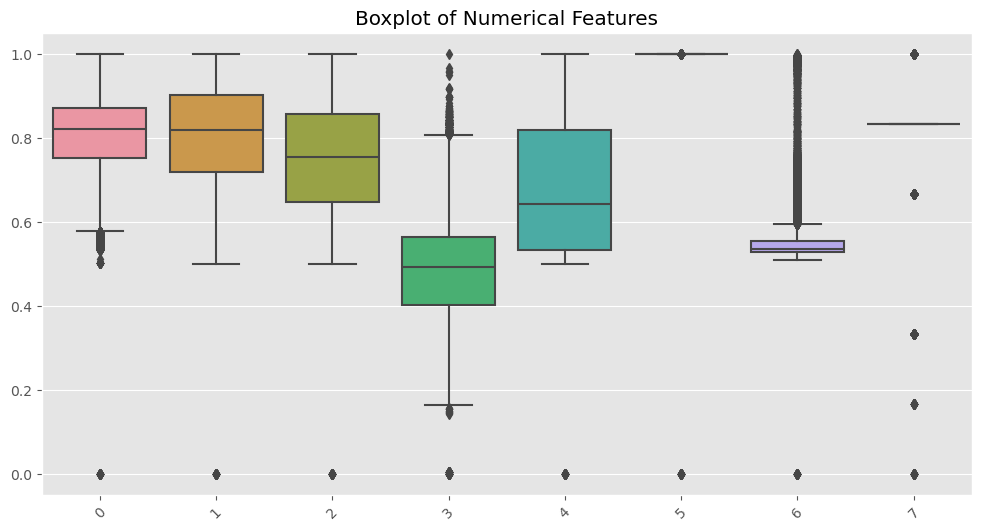

In [36]:
# Now all selected features values range from 0 to 1.

plt.figure(figsize=(12, 6))
sns.boxplot(data=matrix_normalised_features)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

### Obtained Normalised DF. df30. This dataset is cleaned and ready to be trained on.

In [38]:
#attach column names back to df
df30_normalised=pd.DataFrame(matrix_normalised_features,columns=selected_features)
df30_normalised

,danceability,energy,valence,tempo,acousticness,loudness,speechiness,time_signature
0,0.882679,0.9850,0.731328,0.464776,0.513076,0.999928,0.563042,0.833333
1,0.896274,0.8965,0.912782,0.688862,0.543637,0.999931,0.559061,0.666667
2,0.733635,0.7455,0.801003,0.709615,0.516583,0.999898,0.588566,0.833333
3,0.865055,0.8150,0.682707,0.709615,0.614729,0.999877,0.737621,0.833333
4,0.850453,0.8740,0.798496,0.539324,0.508667,0.999891,0.591118,0.833333
...,...,...,...,...,...,...,...,...
62234,0.945116,0.7345,0.753885,0.419239,0.543537,0.999873,0.690658,0.833333
62235,0.922961,0.8445,0.763910,0.460808,0.540481,0.999937,0.551965,0.833333
62236,0.927492,0.8825,0.836591,0.510595,0.505601,0.999929,0.580398,0.833333
62237,0.846928,0.9305,0.721303,0.315363,0.551603,0.999927,0.655947,0.833333


In [19]:
# find similarities between the songs using cosine similarity

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
'''
similarity_matrix=cosine_similarity(df3_normalised)
similarity_matrix
'''
#60000 rows takes 2 minutes but takes up whole RAM, bad idea

array([[1.        , 0.98788648, 0.98473518, ..., 0.99737014, 0.99620427,
        0.99526327],
       [0.98788648, 1.        , 0.99134489, ..., 0.99308813, 0.97799195,
        0.98710517],
       [0.98473518, 0.99134489, 1.        , ..., 0.99031596, 0.97665926,
        0.98027086],
       ...,
       [0.99737014, 0.99308813, 0.99031596, ..., 1.        , 0.99320891,
        0.99646914],
       [0.99620427, 0.97799195, 0.97665926, ..., 0.99320891, 1.        ,
        0.99523194],
       [0.99526327, 0.98710517, 0.98027086, ..., 0.99646914, 0.99523194,
        1.        ]])

### TRying out a sample subset of the data

In [39]:
sdf = df30_normalised.sample(n=10000, random_state=42)
sdf

,danceability,energy,valence,tempo,acousticness,loudness,speechiness,time_signature
59405,0.724572,0.5253,0.521153,0.369270,0.952405,0.999758,0.528025,0.833333
38898,0.703424,0.8315,0.795990,0.348276,0.701904,0.999921,0.557580,0.833333
35511,0.791541,0.8610,0.933835,0.452368,0.501078,0.999886,0.529301,0.833333
53776,0.927492,0.7990,0.983459,0.522924,0.520842,0.999901,0.533435,0.833333
44054,0.634945,0.6340,0.526617,0.564485,0.752004,0.999775,0.536141,0.833333
...,...,...,...,...,...,...,...,...
10371,0.634945,0.8015,0.605013,0.660352,0.780561,0.999920,0.529199,0.833333
11778,0.867069,0.8540,0.660150,0.583479,0.702906,0.999844,0.590097,0.833333
12263,0.905337,0.8590,0.775439,0.398469,0.627756,0.999882,0.559163,0.833333
26814,0.717523,0.7145,0.686717,0.585314,0.948397,0.999922,0.526953,0.666667


## Building the Model

### Cosine Similarity Matrix

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
matrix_csm=cosine_similarity(sdf)

In [44]:
print(matrix_csm)

[[1.         0.97340383 0.94521603 ... 0.96660513 0.98482456 0.95941949]
 [0.97340383 1.         0.99158016 ... 0.99500745 0.98073422 0.99651147]
 [0.94521603 0.99158016 1.         ... 0.99384758 0.96372181 0.99579718]
 ...
 [0.96660513 0.99500745 0.99384758 ... 1.         0.97526688 0.99814154]
 [0.98482456 0.98073422 0.96372181 ... 0.97526688 1.         0.97111985]
 [0.95941949 0.99651147 0.99579718 ... 0.99814154 0.97111985 1.        ]]


In [51]:
# Convert to DataFrame for easier viewing
df40_sm = pd.DataFrame(matrix_csm,index=sdf.index, columns=sdf.index)

In [52]:
df40_sm

,59405,38898,35511,53776,44054,32379,46839,23819,59427,41775,...,55105,42516,16947,22062,41522,10371,11778,12263,26814,32961
59405,1.000000,0.973404,0.945216,0.945212,0.987931,0.960156,0.989372,0.981611,0.965276,0.952697,...,0.948830,0.989632,0.937718,0.988437,0.962037,0.976657,0.973840,0.966605,0.984825,0.959419
38898,0.973404,1.000000,0.991580,0.985742,0.981894,0.997523,0.990928,0.998624,0.969837,0.982796,...,0.993571,0.989875,0.967662,0.983364,0.991430,0.983491,0.989671,0.995007,0.980734,0.996511
35511,0.945216,0.991580,1.000000,0.997421,0.966561,0.995571,0.977312,0.984296,0.965639,0.992869,...,0.998034,0.974535,0.968245,0.969261,0.988124,0.972036,0.985050,0.993848,0.963722,0.995797
53776,0.945212,0.985742,0.997421,1.000000,0.964422,0.991035,0.976588,0.978097,0.964521,0.998161,...,0.993937,0.976073,0.971089,0.969985,0.987711,0.968245,0.984739,0.992666,0.964070,0.990754
44054,0.987931,0.981894,0.966561,0.964422,1.000000,0.970032,0.995573,0.983691,0.993599,0.970010,...,0.968864,0.985054,0.945319,0.996793,0.968172,0.996377,0.990255,0.977427,0.989260,0.974963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10371,0.976657,0.983491,0.972036,0.968245,0.996377,0.972521,0.994598,0.981933,0.993418,0.970771,...,0.975935,0.980901,0.950701,0.995885,0.973275,1.000000,0.992601,0.978811,0.990711,0.979129
11778,0.973840,0.989671,0.985050,0.984739,0.990255,0.986354,0.995144,0.986911,0.986869,0.986547,...,0.989295,0.987865,0.968443,0.993871,0.982574,0.992601,1.000000,0.994185,0.986098,0.991424
12263,0.966605,0.995007,0.993848,0.992666,0.977427,0.996916,0.988665,0.991904,0.969777,0.990802,...,0.996523,0.987713,0.973868,0.982295,0.988997,0.978811,0.994185,1.000000,0.975267,0.998142
26814,0.984825,0.980734,0.963722,0.964070,0.989260,0.969836,0.994718,0.981551,0.976167,0.968538,...,0.967465,0.990551,0.969007,0.995068,0.983645,0.990711,0.986098,0.975267,1.000000,0.971120


In [67]:
def recommend_songs(track_id,similarity_matrix,top_n=4):
    if track_id not in similarity_matrix.index:
        return "Track id unavailable in sm"

    similarity_scores=similarity_matrix.loc[track_id] 
    # will return a kinda dict with

    similar_tracks = similarity_scores.sort_values(ascending=False).iloc[1:top_n+1]

    return similar_tracks.index

In [79]:
your_song_id=10371
new_ids=recommend_songs(your_song_id,df40_sm,5)
new_ids

Index([10371, 2266, 44401, 36690, 17832], dtype='int64')

In [80]:
your_song_details=df.loc[your_song_id,["track_name","artist_name"]]
display(your_song_details)
details = df.loc[new_ids, ["track_name", "artist_name"]]
details

track_name            Light Upon Light
artist_name    A.R. Rahman, Sami Yusuf
Name: 10371, dtype: object

,track_name,artist_name
10371,Light Upon Light,"A.R. Rahman, Sami Yusuf"
2266,Rise of Laththi,Yuvan Shankar Raja
44401,503,"Hans Zimmer, Joshua Bell, Nick Glennie-Smith"
36690,Poiva Maghale,"Vijay Yesudas, Na.Muthukumar"
17832,Maranthuvidu (Karaoke Track),Shankar Mahadevan


In [84]:
#Export

df40_sm.to_pickle("export_similarity_matrix.pkl")
df.to_csv("export_dataset.csv", index=False)

In [83]:
sdf

,danceability,energy,valence,tempo,acousticness,loudness,speechiness,time_signature
59405,0.724572,0.5253,0.521153,0.369270,0.952405,0.999758,0.528025,0.833333
38898,0.703424,0.8315,0.795990,0.348276,0.701904,0.999921,0.557580,0.833333
35511,0.791541,0.8610,0.933835,0.452368,0.501078,0.999886,0.529301,0.833333
53776,0.927492,0.7990,0.983459,0.522924,0.520842,0.999901,0.533435,0.833333
44054,0.634945,0.6340,0.526617,0.564485,0.752004,0.999775,0.536141,0.833333
...,...,...,...,...,...,...,...,...
10371,0.634945,0.8015,0.605013,0.660352,0.780561,0.999920,0.529199,0.833333
11778,0.867069,0.8540,0.660150,0.583479,0.702906,0.999844,0.590097,0.833333
12263,0.905337,0.8590,0.775439,0.398469,0.627756,0.999882,0.559163,0.833333
26814,0.717523,0.7145,0.686717,0.585314,0.948397,0.999922,0.526953,0.666667


RangeIndex(start=0, stop=62317, step=1)